#### 회귀분석
- 회귀분석은 실제값과 예측값의 차이를 기반으로 한 지표들을 중심으로 성능평가가 지표로 발전

#### MAE
- 실제값과 예측값의 차이를 절대값으로 변환하여 평균한 것
- 에러의 크기가 그래도 반영
- 이상치에 영향을 받는다

#### MSE
- 실제값과 예측값의 차이를 제곱해 평균한 것
- 실제값과 예측값의 차이의 면적 합을 의미
- 특이값이 존재하면 수치가 증가하는 경향이 있음

#### RMSE
- 실제값과 예측값의 차이를 제곱한 평균의 루트
- 에러에 제곱을 에러가 클수록 그에 따른 가중치가 높이 반영
- 손실이 기하급수적으로 증가하는 상황에서 실제 오류 평균보다 값이 더 커지는 것을 상쇄하기 위해 사용

#### MSLE
- 실제값과 예측값의 차이를 제곱해 평균한 것에 로그를 적용한 것
- RMSE와 같이 손실이 기하급수적으로 증가하는 상황에서 실제 오류 평균보다 값이 값이 커지는 상쇄하기 위해 사용

#### MAPE
- MAE를 퍼센트로 표시
- 오차가 예측값에서 차지하는 정도를 나타냄

#### 회귀 분석 순서
1. 데이터를 로드하고 확인
2. 데이터를 분할
3. 데이터의 전처리
4. 모델 학습
5. 성능 평가 및 예측값 저장

In [73]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [74]:
data = fetch_california_housing()

In [75]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [76]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [77]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [78]:
# df는 독립변수
# target 종속변수

In [79]:
df['Value'] = data['target']

In [80]:
# 데이터프레임을 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Value       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [81]:
# 결측치 확인
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Value         0
dtype: int64

In [82]:
# 산점도와 선형 회귀 직선 시각화
import matplotlib.pyplot as plt
import seaborn as sns

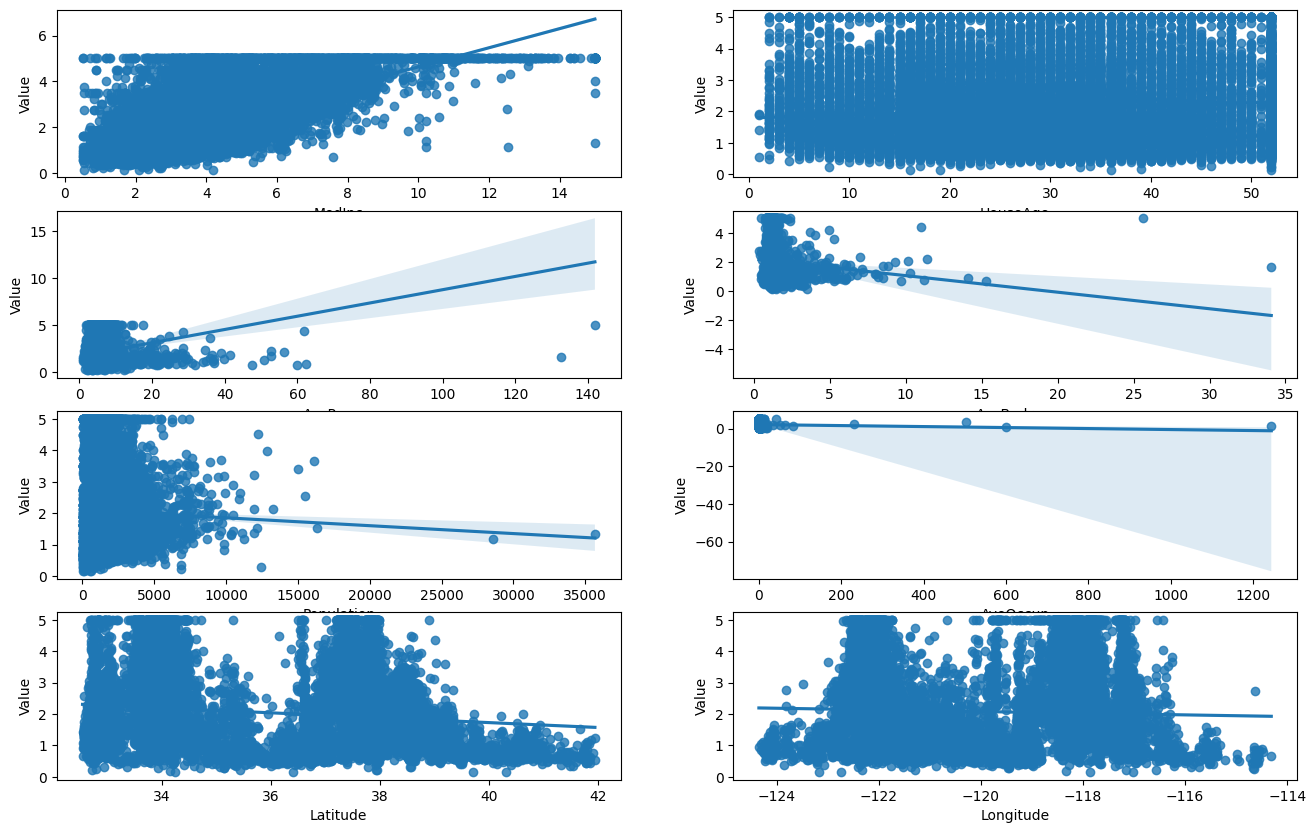

In [83]:
fig, axes = plt.subplots(figsize = (16, 10), nrows=4, ncols=2)

for i in range(8):
    row  = int(i/2)
    col = i%2
    sns.regplot(x = df.iloc[:, i], y = df['Value'], ax = axes[row][col])
plt.show()

In [84]:
from sklearn.model_selection import train_test_split
# 데이터의 분할
# train, test / 독립, 종속
x = df.drop('Value', axis=1)
y = df['Value']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [85]:
# value의 평균을 train, test 확인
print("train 데이터의 value의 평균", y_train.mean())
print("test 데이터의 value의 평균", y_test.mean())

train 데이터의 value의 평균 2.0715573843265505
test 데이터의 value의 평균 2.056561308139535


In [48]:
# 데이터를 스케일링
# max abs 스케일링
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
scaler.fit(x_train)

MaxAbsScaler()

In [49]:
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

In [50]:
# 선형 회귀 알고리즘
from sklearn.linear_model import LinearRegression
# 객체 생성
linear = LinearRegression()

In [51]:
# fit -> 학습
linear.fit(x_train_sc, y_train)

LinearRegression()

In [52]:
pred = linear.predict(x_test_sc)

In [53]:
pred

array([2.07653781, 1.57976836, 2.08731697, ..., 1.04278469, 1.12583146,
       1.9625772 ])

In [54]:
y_test

8151     2.45300
53       1.04200
3039     1.46200
9484     1.54200
9307     3.24200
          ...   
16733    1.17200
5264     5.00001
12374    2.39300
19662    0.85700
11942    1.13900
Name: Value, Length: 4128, dtype: float64

In [55]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [56]:
# 학습 데이터를 예측한 결과를 저장
pred = linear.predict(x_train_sc)

mae = mean_absolute_error(y_train, pred)
mse = mean_squared_error(y_train, pred)
rmse = np.sqrt(mse)

# 결정계수 출력
r2 = r2_score(y_train, pred)

print('MAE : ', round(mae, 2))
print('MSE : ', round(mse, 2))
print('RMSE : ', round(rmse, 2))
print('R2 : ', round(r2, 2))

MAE :  0.53
MSE :  0.53
RMSE :  0.73
R2 :  0.6


In [57]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
scaler.fit(x_train)

MaxAbsScaler()

In [ ]:
# Scaler를 Standard
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
scaler2.fit(x_train)
x_train_sc2 = scaler2.transform(x_train)
x_test_sc2 = scaler2.transform(x_test)
# 학습
linear.fit(x_train_sc2, y_train)
# MAE, MSE, RMSE, R2Score는 test_data로 확인
linear2 = LinearRegression()
linear2.fit(x_train_sc2, y_train)
pred2 = linear2(x_test_sc2)

mae2 = mean_absolute_error(y_train, pred2)
mse2 = mean_squared_error(y_train, pred2)
rmse2 = np.sqrt(mse)

r2_2 = r2_score(y_train, pred2)

print('MAE : ', round(mae2, 2))
print('MSE : ', round(mse2, 2))
print('RMSE : ', round(rmse2, 2))
print('R2 : ', round(r2_2, 2))


MAE :  0.53
MSE :  0.53
RMSE :  0.73
R2 :  0.6


In [ ]:
# Scaler를 Robust
from sklearn.preprocessing import RobustScaler

scaler3 = RobustScaler()
scaler3.fit(x_train)
x_train_sc3 = scaler3.transform(x_train)
x_test_sc3 = scaler3.transform(x_test)
# 학습
linear.fit(x_train_sc3, y_train)
# MAE, MSE, RMSE, R2Score는 test_data로 확인
linear3 = LinearRegression()
linear3.fit(x_train_sc3, y_train)
pred3 = linear3(x_test_sc3)

mae3 = mean_absolute_error(y_train, pred3)
mse3 = mean_squared_error(y_train, pred3)
rmse3 = np.sqrt(mse3)

r2_3 = r2_score(y_train, pred3)  

print('MAE : ', round(mae3, 2))
print('MSE : ', round(mse3, 2))
print('RMSE : ', round(rmse3, 2))
print('R2 : ', round(r2_3, 2))

MAE :  0.53
MSE :  0.53
RMSE :  0.73
R2 :  0.6
